# Data Science

***


WS 2023

Dr. Cristian Grozea


***

## Machine Learning

### Deep Learning

- Neural Networks
- Gradient Descent
- Backpropagation
- Keras


# Course Plan

1. #Introduction to Machine Learning (ML)
    * #Examples of Applications
    * #Types of machine learning
    * #Issues around ML
    * #Testing and Validation
1. Classification and Regression
    * #Datasets
    * #Binary classification
    * #Accuracy measures
    * #Multiclass classification
1. Various model types and Training models
    * #Linear regression
    * #Polynomial regression
    * Regularisation (self-study - p.32-, p.155-, p.202-)
    * Logistic Regression (to be covered briefly)
    * Training Models
1. #Local learning/k-NN
1. Support Vector Machines (self-study - Chapter 5 p.175-)
1. Decision Trees
1. Ensemble Learning, Random Forest, XGBoost
1. Dimensionality Reduction
1. Unsupervised Learning
1. #Statistics: Definitions and Tools
1. **[continued today] Neural Networks/Deep Learning**
1. Reinforcement Learning, Deep Reinforcement Learning
    


# The Perceptron
## Simplistic model of a neuron

$$y=h(w^Tx+b)$$


|name|what it is            |
-------|---------------------
|$x$   | input, $x\in \mathbf{R}^n$ |
|$w$ | weights, $w\in \mathbf{R}^n$ |
|$b$ | bias $b\in \mathbf{R}$|
|$h$   | non-linear activation function, $h:\mathbf{R}\to \mathbf{R}$|

$activation=w_1*x_1+w_2*x_2+w_3*x_3+b$

![image.png](attachment:image.png)

## Activation functions
- Heaviside
    
    $    h(x)=    \begin{cases}1 & x \ge0 \\ 0& else\end{cases}$
    
- ReLU (Rectified Linear Unit)

    $h(x)=max(x,0)$
    
- Sigmoid
    
    $h(x)=\frac{1}{1+e^{-x}}$
    
    Note: fitting a perceptron with sigmoid activation function, used for classification is named **logistic regression**
    

- Hyperbolic tangent (Tanh)
    
    $h(x)=\frac{e^{2x}+1}{e^{2x}-1}$

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-20,20,100)
np.random.seed(327643)

## Training the Perceptron

- by extending all inputs with an extra feature, constant 1, one can assume the activation is just
$$w^Tx$$

### The perceptron learning rule (Rosenblatt) - online learning

$$w_{t+1}=w_{t}+\eta(y_t-\hat{y_t})x_t$$
where

|name|what it is            |
-------|---------------------
|$w_{t}$   | the weights at the moment $t$|
|$w_{t+1}$ | the weights at the moment $t+1$|
|$x_t$|the sample considered at time $t$|
|$y_t$|the target for the sample considered at time $t$|
|$\hat{y_t}$|the prediction of the model with the weights $w_t$|
|$\eta$|the learning rate, $\eta \in \mathbf{R}_+$|


# Multi-Layer-Perceptron (MLP-) Networks
![image.png](attachment:image.png)
(image from the Hands On ML book by Aurelien Geron)

## Expressive Power of MLP FF NN for Classification

- combining with arbitrary logic...
- arbitrary linear partitions of the space

=> can approximate any partition - here a disc approximated with an intersection of semiplanes

![image.png](attachment:image.png)

# How are the neural networks trained?

## Credit/Blame Assignment

see https://arxiv.org/pdf/1404.7828.pdf p. 4:

``Which modifiable components of a learning system are responsible for its success or failure? What
changes to them improve performance? This has been called the fundamental credit assignment prob-
lem (Minsky, 1963)."

- refering to

[Minsky, M. (1963). Steps toward artificial intelligence. In Feigenbaum, E. and Feldman, J., editors,
Computers and Thought, pages 406–450. McGraw-Hill, New York.]

If the activation functions used are derivable (sigmoid, tanh), the functions implemented by any neural networks
$F(x;\theta)$ are derivable both w.r.t. x and w.r.t. $\theta$.

The same holds true for the total network error $E(F(x;\theta)-t)$, when the error measurement function is derivable (e.g. MSE
$E(z)=\|z\|_2^2$
).


## (Stochastic) Gradient Descent

### (S)GD

$$min_\theta f(\theta)$$


Local Taylor decomposition around any point $\theta_0$:

$$f(\theta)=f(\theta_0)+f'(\theta_0)*(\theta-\theta_0)+f"(\theta_0)*(\theta-\theta_0)^2+(\ldots )$$

Local linear approximation with a hyperplane (multivariate) of $f(\theta)$ around $\theta_0$

$$f(\theta)\approx f(\theta_0)+\nabla f(\theta_0)^T*(\theta-\theta_0)$$



The direction of the steepest descent is the antigradient
$$\theta_{new}=\theta-\nabla f(\theta_0)$$
ensures the steepest descent among all vectors of the same magnitude (norm) in the approximation hyperplane.

In [ ]:
import plotly.graph_objects as go

z1=np.fromfunction(lambda x,y:(x-y)**3,(100,100))

fig = go.Figure(data=[go.Surface(z=z1)])
fig.update_layout(autosize=False,width=800, height=800,margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
import sympy as smp
from sympy import *

w,b=smp.symbols("w,b")

### Example for a single perceptron (neuron) "network"

In [ ]:
# zip
l1=list(np.arange(0,8))
l1
l2=list(np.arange(20,28))
l2
list(zip(l1,l2))

In [ ]:
data=np.random.rand(10)
t=(data>0.7).astype('int')*2-1
print(t)

def neuron(x):
    return tanh(x*w+b)

#compute network SSE:
e=0
for x,y in zip(data,t):
    e+=(neuron(x)-y)**2
e/=len(t)

In [ ]:
e

In [ ]:
e.subs(b,0.7).subs(w,-2.6)

### Error Surface

Fitting the model means finding a minimum point of the error surface.

Procedure:

1. start with a random point
1. iterate until no further improvement possible
    - make one step in the direction of the antigradient
    

- global minimum
- local minimum

In [ ]:
k=32;range1=np.linspace(-10,10,k)
z1=[e.subs(b,u).subs(w,v) for u in range1 for v in range1]
z1=np.array(z1).reshape(k,-1).astype("float")
import matplotlib.pyplot as plt
plt.imshow(z1)
plt.colorbar()

### Error Surface

In [ ]:
fig = go.Figure(data=[go.Surface(z=z1)])
fig.update_layout(autosize=False,width=800, height=800,margin=dict(l=65, r=50, b=65, t=90))
fig.show()

# Computing the Gradient for GD/SGD

In [ ]:
e

In [ ]:
diff(e,b)

In [ ]:
diff(e,w)

### gradient $\nabla e (w,b)$

In [ ]:
[diff(e,w),diff(e,b)]

# Backpropagation

- means using the chain rules in derivation and computing the gradient w.r.t. all network's parameters starting from the output and going backward towards the input

- can be done for single sample and for a batch of samples (usually less than the whole dataset, although this is also possible)

- implemented in frameworks such as pytorch, tensorflow and implicitly in keras

- you never have to compute yourself partial derivates/gradients, this is performed automatically for you in the so called "backward pass". The forward pass is when the inputs are propagated through the network towards the output




![image.png](attachment:image.png)

from the Hands-on ML book, p.139

![image.png](attachment:image.png)
from the Hands-on ML book, p.139

![image.png](attachment:image.png)
from the Hands-on ML book, p.140

![image.png](attachment:image.png)
from the Hands-on ML book, p.140

## Types and Variants of Gradient Descent Optimization

### By how many samples are considered
- 1 (like in the perceptron learning): **SGD** when the sample x is chosen randomly from the dataset
    - noisy, takes sometimes the locally wrong direction
- all: **batch learning**, batch gradient descent
    - much smoother, but has a higher tendency to fall in local minima **and stay there**
    - much more demanding wrt to processing requirements
- some: **minibatch** stochastic gradient descent
    - uses a few randomly selected samples at each step
    - the gradient is less noisy than for single-sample SGD
    - and the processing is less intensive than full batch gradient descent


   

### Variants (often heuristics attempting to accelerate it):

see http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

- Momentum
  - Nesterov Momentum
- RMSProp
- Adam (=RMSProp + Momentum) https://arxiv.org/abs/1412.6980
- Nadam (=Adam+Nesterov momentum)

    

Optimizers available in Keras

    SGD
    RMSprop
    Adam
    AdamW
    Adadelta
    Adagrad
    Adamax
    Adafactor
    Nadam
    Ftrl


# Frameworks for deep learning (DL)

- Tensorflow (Google) https://www.tensorflow.org/
- pytorch (Meta ex Facebook) https://pytorch.org/
- **keras** (formerly independent, now Google) https://keras.io/
    - this is the one we will target
- others (mxnet, etc.)


# Keras Intro
https://keras.io/


``Because of its ease-of-use and focus on user experience, Keras is the deep learning solution of choice for many university courses. It is widely recommended as one of the best ways to learn deep learning.''




In [ ]:
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
# x,y=load_digits(return_X_y=True)
# plt.imshow(x[1].reshape(8,-1),cmap='gray')
# x_tr,x_te,y_tr,y_te=train_test_split(x,y)


4422102/4422102 [==============================] - 0s 0us/step


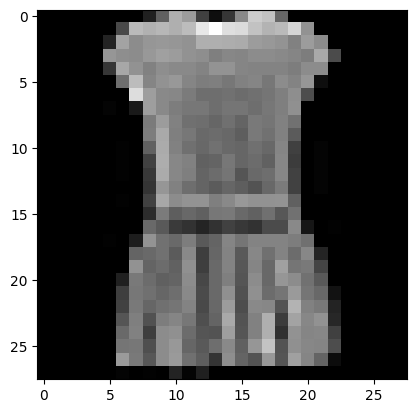

In [3]:
# https://keras.io/api/datasets/fashion_mnist/
import keras
import sklearn
import matplotlib.pyplot as plt
import numpy as np
(x_tr, y_tr), (x_te, y_te) = keras.datasets.fashion_mnist.load_data()
plt.imshow(x_tr[3].reshape(28,-1),cmap='gray')
#-1 because it can compute the rest of the dimensions automatically

In [4]:
#examine the data
import plotly.express as px
from sklearn.decomposition import PCA
#PCA - principal component analysis.
#to reduce the number of dimensions for easy analysis and see data in 3D
dec=17
dv=PCA(3,whiten=False).fit_transform(x_tr[::dec].copy().reshape(-1,28*28)) #data projected for visualization
fig = px.scatter_3d(x=dv[:,0],y=dv[:,1],z=dv[:,2],
              color=y_tr[::dec],text=y_tr[::dec],size_max=0.2,opacity=1)
fig.update_layout(autosize=True,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

#whatch show 3s, 9s and 5s are next to each other
#we do neural networks rather than classification because
#neural network might have higher accuracy so we use.
#data looks very mixed so we use NN

## Why approach this with a neural network?

In [100]:
# within-class data similarity
#looking just at trousers for example
#so 5 7 and 27 are class2
ix=np.where(y_tr==6)[0][:3]
#ix=np.where(y_tr==0)[0][:3]

ix

array([18, 32, 33])

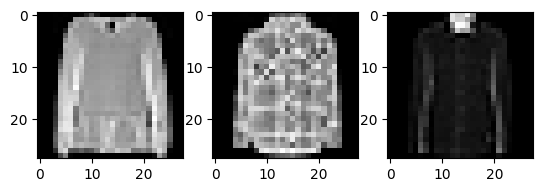

In [101]:
plt.subplot(131);plt.imshow(x_tr[ix[0]].reshape(-1,28),cmap="gray")
plt.subplot(132);plt.imshow(x_tr[ix[1]].reshape(-1,28),cmap="gray")
plt.subplot(133);plt.imshow(x_tr[ix[2]].reshape(-1,28),cmap="gray")

In [7]:
sklearn.preprocessing.OneHotEncoder?
#for class 2, you write 0100000000.
#we can convert for easier analysis
#we do this on the labels for NN otherwise
#last neuron will give sigmoid who's value is between 0 and 1.
#so in the last neuron level you can't get 3 as a value.
#so it is not good to do classification based on regression

In [8]:
#multiclass -> convert labels to one_hot encoding
#using an object called one hot encoder
preproc=sklearn.preprocessing.OneHotEncoder(categories='auto')#np.array(range(10)).reshape(1,-1))
y_tr1hot=preproc.fit_transform(y_tr.reshape(-1,1)).todense();y_te1hot=preproc.transform(y_te.reshape(-1,1)).todense()
y_tr1hot[:3,:],y_tr[:3]
#sparse matrices are used. Store only position of element which is 1 and not entire matrix.

(matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([9, 0, 0], dtype=uint8))

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten,Conv2D,Reshape,MaxPool2D,Dropout
from keras.layers import LeakyReLU
#sequential is stack of layers. sequence of layers is created.
#dense fully connected.
#conv2D - take the average of 2v2 or 3v3
#maxpoo2D - take the max of a 2v2 or 3v3 etc..
#dropout - drop rand0m outputs from previous layers to next layer

``Dense'' is a layer of fully-connected neurons in a MLP/FFNN.

``units'' is the size of the output (how many neurons in this layer)

``tf.keras.layers.Dense(
    units,
    activation=None, ...''

In [10]:
#Sequential

In [102]:
# model=Sequential([Input(shape=64),Dense(10,activation="sigmoid")])
model=Sequential([
    Input(shape=(28,28)),
    Reshape((28,28,1)), #because reshape asked for one single argument
    #Conv2D(26,kernel_size=(3,3),activation='relu'),
    Conv2D(26,kernel_size=(3,3),activation='LeakyReLU'),
    Conv2D(52,kernel_size=(3,3),activation='LeakyReLU'),
    #52 is the number of neurons
    Conv2D(104,kernel_size=(3,3),activation='LeakyReLU'),
    #104 is the different number of times each image is projected as. So a
    #   shirt will be projected in 104 different ways
    #LeakyReLU(negative_slope=0.5),
    #larger kernel reduces the parameters - 3v3 got rid of the paramters on side
    Flatten(),
    #Dropout(0.7),
    Dropout(0.5),
    #whatever comes out of the flatten half of them are dropped out
    #it will 0 some of the outputs
    #it improves accuracy by generaliing - less overfitting
    #positional arguments don't need to give the name
    #... design it live
    Dense(10,activation="softmax"),
    #don't change softmax
    #MaxPool2D(pool_size=(2, 2)),
])
# print(y1)
model.summary()
#softmax means one neuron per class

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 26)        260       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 52)        12220     
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 104)       48776     
                                                                 
 flatten_10 (Flatten)        (None, 50336)             0         
                                                                 
 dropout_10 (Dropout)        (None, 50336)             0         
                                                                 
 dense_10 (Dense)            (None, 10)              

In [103]:
# model.compile(keras.optimizers.SGD(learning_rate=1),"mse")
#model.compile("SGD","mse")
# model.compile("adam","mse")
# model.compile(keras.optimizers.SGD(learning_rate=1e-5),"categorical_crossentropy")
# model.compile("adam","categorical_crossentropy",metrics=["accuracy"])
# model.compile("SGD","categorical_crossentropy",metrics=["accuracy"])
#model.compile(keras.optimizers.SGD(learning_rate=1e-2),"categorical_crossentropy",metrics=["accuracy"])
model.compile(keras.optimizers.Adam(learning_rate=0.001),"categorical_crossentropy",metrics=["accuracy"])
#Adam is stronger than SGD

one ``Epoch'' == one full pass through the training data

In [ ]:
tr_hist=model.fit(x_tr,y_tr1hot,validation_data=[x_te,y_te1hot],epochs=100,batch_size=4096)
#it is training it

Epoch 1/100
15/15 [==============================] - 17s 696ms/step - loss: 18.0496 - accuracy: 0.5682 - val_loss: 3.8331 - val_accuracy: 0.7703
Epoch 2/100
15/15 [==============================] - 6s 378ms/step - loss: 2.8420 - accuracy: 0.7786 - val_loss: 1.6723 - val_accuracy: 0.8067
Epoch 3/100
15/15 [==============================] - 6s 380ms/step - loss: 1.2577 - accuracy: 0.8163 - val_loss: 0.8370 - val_accuracy: 0.8233
Epoch 4/100
15/15 [==============================] - 6s 380ms/step - loss: 0.7810 - accuracy: 0.8259 - val_loss: 0.6338 - val_accuracy: 0.8414
Epoch 5/100
15/15 [==============================] - 6s 380ms/step - loss: 0.6212 - accuracy: 0.8387 - val_loss: 0.5279 - val_accuracy: 0.8568
Epoch 6/100
15/15 [==============================] - 6s 383ms/step - loss: 0.5389 - accuracy: 0.8485 - val_loss: 0.4795 - val_accuracy: 0.8607
Epoch 7/100
15/15 [==============================] - 6s 386ms/step - loss: 0.5067 - accuracy: 0.8505 - val_loss: 0.4564 - val_accuracy: 0.86

Each epoch is increasing the training and improving accuracy

Sometimes try 100% on the training set
And then increase test set

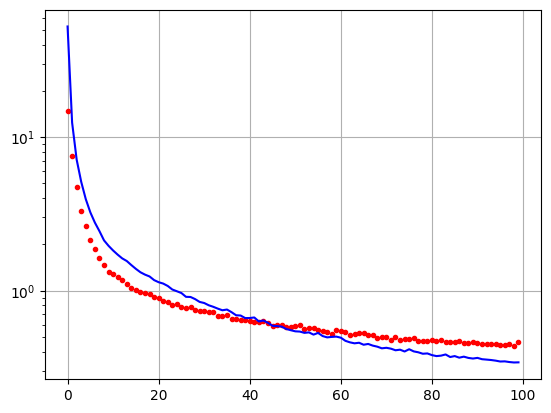

In [73]:
plt.semilogy(tr_hist.epoch,tr_hist.history['val_loss'],'r.')
plt.semilogy(tr_hist.epoch,tr_hist.history['loss'],'b')
plt.grid(1)
#so error on training set is reducing but on test set it is much more. So now it is the queue for us to stop

The above graph is a loss. We are minimizing the loss. The loss is from training and validation loss is from test set.

In [75]:
pred=model.predict(x_tr) # model(x_tr) works as well
pred.shape
#now we have a candidate for every class

1875/1875 [==============================] - 3s 2ms/step


(60000, 10)

In [89]:
#examine the data
import plotly.express as px
from sklearn.decomposition import PCA
#PCA - principal component analysis.
#to reduce the number of dimensions for easy analysis and see data in 3D
dec=17
dv=PCA(3,whiten=False).fit_transform(pred[::dec].copy()) #data projected for visualization
#removed the reshape in the above line because it is already flattened
#fig = px.scatter_3d(x=dv[:,0]+np.random.rand(dv.shape[0])/10,y=dv[:,1]+np.random.rand(dv.shape[0])/10,z=dv[:,2]+np.random.rand(dv.shape[0])/10,
#              color=y_tr[::dec],text=y_tr[::dec],size_max=0.2,opacity=1)
fig=px.scatter_3d(x=dv[:,0]+np.random.rand(dv.shape[0])/10,y=dv[:,1]+np.random.rand(dv.shape[0])/10,z=dv[:,2]+np.random.rand(dv.shape[0])/10,
color=y_tr[::dec],size_max=0.2,opacity=0.1)
fig.update_layout(autosize=True,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()
#increase the spread and distribute the points more
#the problem is the points are very close - so we need to spread them by adding noise
#using "+ random numbers"
#because all the numbers are between 0 and 1. So add something less

In [82]:
px.scatter_3d?

In [ ]:
print(y_tr[0])
plt.stem(pred[0])#,use_line_collection=True)

In [ ]:
#accuracy
np.mean(keras.metrics.sparse_categorical_accuracy(y_tr,pred))

In [ ]:
#accuracy on test:
np.mean(keras.metrics.sparse_categorical_accuracy(y_te,model.predict(x_te)))

Where to go from here:

The deep learning course of François Fleuret

https://fleuret.org/dlc/